# Baseline Model Creation

In [1]:
import os

# Move working directory to project root if executed inside notebooks/
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

print("Working directory:", os.getcwd())

Working directory: c:\Coding\pytorch\bank-marketing-ml


# Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import precision_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample


# **UNBALANCED DATASET**

For the purposes of understanding, I will first perform these models on an unbalanced dataset

# Load Dataset

In [3]:
dataset_path = "data/processed/bank_processed_unbalanced.csv"
df = pd.read_csv(dataset_path)


# Seperate

In [4]:
X = df.drop(columns=['y_yes'])
y = df["y_yes"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# BALANCE THE DATASET

In [5]:
# don't run these to see correct unbalanced datasets

minority = df[df["y_yes"] == 1]
majority = df[df["y_yes"] == 0]

majority_down = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

df_downsampled = pd.concat([majority_down, minority]).sample(frac=1, random_state=42).reset_index(drop=True)
df = df_downsampled

# Logistic Regression

Confusion Matrix:
[[7560  104]
 [ 830  177]]

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94      7664
        True       0.63      0.18      0.27      1007

    accuracy                           0.89      8671
   macro avg       0.77      0.58      0.61      8671
weighted avg       0.87      0.89      0.86      8671



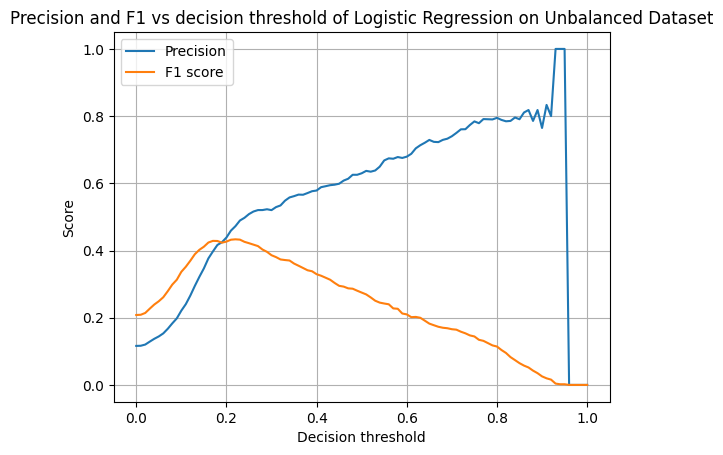

In [6]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


probs = lr.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0.0, 1.0, 101)
precisions = []
f1s = []

for t in thresholds:
    preds = (probs >= t).astype(int)
    precisions.append(precision_score(y_test, preds, zero_division=0))
    f1s.append(f1_score(y_test, preds, zero_division=0))

plt.figure()
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, f1s, label="F1 score")
plt.xlabel("Decision threshold")
plt.ylabel("Score")
plt.title("Precision and F1 vs decision threshold of Logistic Regression on Unbalanced Dataset")
plt.grid(True)
plt.legend()
plt.show()


# Analysis - Unbalanced
The preliminary model exhibits very poor performance on the positive class, a consequence of the significant class imbalance and the relatively weak predictive signal available in the features.

For the sake of robustness, we will implement random forest next with this unbalanced data

# Analysis - Balanced
Instant jump to 63% precision for the positive class but only 0.27 f1


# Random Forest

Random Forest Confusion Matrix:
[[7525  139]
 [ 794  213]]

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      7664
        True       0.61      0.21      0.31      1007

    accuracy                           0.89      8671
   macro avg       0.75      0.60      0.63      8671
weighted avg       0.87      0.89      0.87      8671



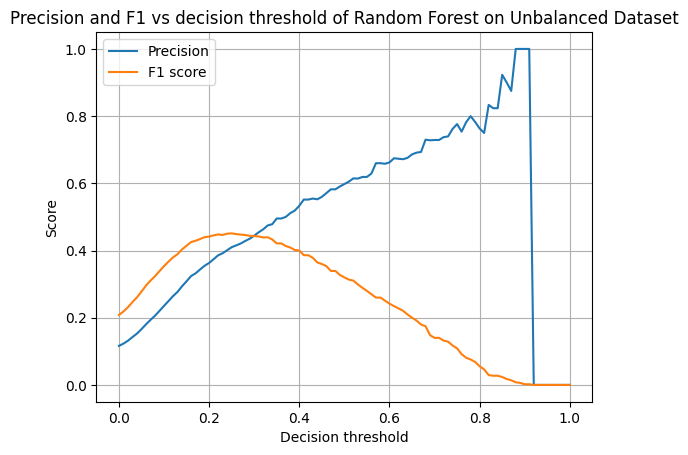

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

probs = rf.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0.0, 1.0, 101)
precisions = []
f1s = []

for t in thresholds:
    preds = (probs >= t).astype(int)
    precisions.append(precision_score(y_test, preds, zero_division=0))
    f1s.append(f1_score(y_test, preds, zero_division=0))

plt.figure()
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, f1s, label="F1 score")
plt.xlabel("Decision threshold")
plt.ylabel("Score")
plt.title("Precision and F1 vs decision threshold of Random Forest on Unbalanced Dataset")
plt.grid(True)
plt.legend()
plt.show()


# Analysis
Better, but only slightly. This dataset has far too much imbalance, and this will need to be solved. However, for robustness, we will in the next notebook implement a neural network with the unbalanced dataset.

# Analysis - Balanced
Instant jump to 63% precision for the positive class, but only 0.32 F1


In [8]:
# save the models 
import joblib

joblib.dump(lr, "models/logistic_regression.pkl")
joblib.dump(rf, "models/random_forest.pkl")


['models/random_forest.pkl']